In [4]:
import sys, datetime
import serial.tools.list_ports
import minimalmodbus
import time
import pandas


data = []
serialData = serial.Serial('COM4', baudrate=115200)

        # Read data from COM port
for i in range(0, 3):
        command = 'R'

        # Предыдущие значения
#Z0 = int(Data_lbl08_ZData.text().split()[0])
#Phi0 = float(Data_lbl14_PhiData.text().split()[0].replace('\u00B0','').replace('\\xb0','').replace(',','.'))

        # Send the command to the DataPort
        serialData.write(command.encode())
        line = serialData.readline().strip()
        data.append(line)
        # Запись данных в форму
#Data_txtBrowser.setText(str(line))
        Bx, By, Bz, Z, Zerr, Phi, PhiErr, T = str(line).split(';')
        print(Bx, By, Bz)
        time.sleep(0.05)
print(data)



b'Bx=113,62 mT  By=-120,282 mT  Bz=0,444 mT
b'Bx=113,619 mT  By=-120,285 mT  Bz=0,442 mT
b'Bx=113,619 mT  By=-120,282 mT  Bz=0,441 mT
[b'Bx=113,62 mT; By=-120,282 mT; Bz=0,444 mT; Z=91539 um; Zerr=NULL; PHI=210,212\xb0; PHIerr=0\xb0; T=22,68 \xb0C', b'Bx=113,619 mT; By=-120,285 mT; Bz=0,442 mT; Z=91539 um; Zerr=NULL; PHI=210,212\xb0; PHIerr=0\xb0; T=22,68 \xb0C', b'Bx=113,619 mT; By=-120,282 mT; Bz=0,441 mT; Z=91539 um; Zerr=NULL; PHI=210,212\xb0; PHIerr=0\xb0; T=22,68 \xb0C']


In [5]:
serialData.close()

In [6]:
try: # Инициализация двигателя вращения ротора
            # Modbus-адрес драйвера по умолчанию - 1
    instrumentRotor = minimalmodbus.Instrument('COM5', 1) #COM9, 1 - вращение, 2 - линейка
            # Настройка порта: скорость - 38400 бод/с, четность - нет, кол-во стоп-бит - 2.
    instrumentRotor.mode = minimalmodbus.MODE_RTU
    print(instrumentRotor.serial.port)
    instrumentRotor.serial.baudrate = 38400
    instrumentRotor.serial.parity = minimalmodbus.serial.PARITY_NONE
    instrumentRotor.serial.stopbits = 2
            # self.instrumentRotor.serial.databits = 8
    instrumentRotor.serial.timeout  = 0.05          # seconds
            # self.instrumentRotor.close_port_after_each_call = True
    print(instrumentRotor)
    print('Вращение подключено')
except (IOError, AttributeError, ValueError): # minimalmodbus.serial.serialutil.SerialException:
    message = "Привод вращения не виден"
    print(message)




COM5
minimalmodbus.Instrument<id=0x208f2a61400, address=1, mode=rtu, close_port_after_each_call=False, precalculate_read_size=True, clear_buffers_before_each_transaction=True, handle_local_echo=False, debug=False, serial=Serial<id=0x208f2f21720, open=True>(port='COM5', baudrate=38400, bytesize=8, parity='N', stopbits=2, timeout=0.05, xonxoff=False, rtscts=False, dsrdtr=False)>
Вращение подключено


In [7]:
try:
            # Команда включения серво; 0x0405 - адрес параметра; 0x83 - значение параметра
    instrumentRotor.write_registers(0x00F, [1])
except (IOError, AttributeError, ValueError): # minimalmodbus.serial.serialutil.SerialException:
    message = "Запуск привода вращения не удался"
    print(message)

In [8]:
try: # Инициализация двигателя линейки
            # Modbus-адрес драйвера по умолчанию - 1
    instrumentLinear = minimalmodbus.Instrument('COM5', 2) #COM9, 1 - вращение, 2 - линейка
            # Настройка порта: скорость - 38400 бод/с, четность - нет, кол-во стоп-бит - 2.
    instrumentLinear.mode = minimalmodbus.MODE_RTU
    print(instrumentLinear.serial.port)
    instrumentLinear.serial.baudrate = 38400
    instrumentLinear.serial.parity = minimalmodbus.serial.PARITY_NONE
    instrumentLinear.serial.stopbits = 2
            # self.instrumentLinear.serial.databits = 8
    instrumentLinear.serial.timeout  = 0.05          # seconds
            # self.instrumentLinear.close_port_after_each_call = True
    print(instrumentLinear)
    print('Линейка подключена')
except (IOError, AttributeError, ValueError): # minimalmodbus.serial.serialutil.SerialException:
    message = "Привод линейки не виден"
    print(message)



COM5
minimalmodbus.Instrument<id=0x208f2aba600, address=2, mode=rtu, close_port_after_each_call=False, precalculate_read_size=True, clear_buffers_before_each_transaction=True, handle_local_echo=False, debug=False, serial=Serial<id=0x208f2f21720, open=True>(port='COM5', baudrate=38400, bytesize=8, parity='N', stopbits=2, timeout=0.05, xonxoff=False, rtscts=False, dsrdtr=False)>
Линейка подключена


In [9]:
try:
            # Команда включения серво; 0x0405 - адрес параметра; 0x83 - значение параметра
    instrumentLinear.write_registers(0x00F, [1])
except (IOError, AttributeError, ValueError): # minimalmodbus.serial.serialutil.SerialException:
    message = "Запуск привода линейки не удался"
    print(message)

In [7]:
def digit_Z():
    num_char = (",", ".", "+", "-")
    global Z
    l = []

    tokens = Z.split()
    for token in tokens:

        if token.startswith('Z='):
            num = ""
            for char in token:
            #print(char)
                if char.isdigit() or (char in num_char):
                    num = num + char
                #print('click')

            try:
                l.append(num)
            except ValueError:
                pass


    for num in l:
        result = float(num.replace(',', '.'))

    return result    


In [8]:
def digit_Bx():
    num_char = (",", ".", "+", "-")
    global Bx
    l = []

    tokens = Bx.split()
    for token in tokens:

        if token.startswith('Bx='):
            num = ""
            for char in token:
            #print(char)
                if char.isdigit() or (char in num_char):
                    num = num + char
                #print('click')

            try:
                l.append(num)
            except ValueError:
                pass


    for num in l:
        result = float(num.replace(',', '.'))

    return result    

In [9]:
def digit_By():
    num_char = (",", ".", "+", "-")
    global By
    l = []

    tokens = By.split()
    for token in tokens:

        if token.startswith('By='):
            num = ""
            for char in token:
            #print(char)
                if char.isdigit() or (char in num_char):
                    num = num + char
                #print('click')

            try:
                l.append(num)
            except ValueError:
                pass


    for num in l:
        result = float(num.replace(',', '.'))

    return result    

In [10]:
def digit_Bz():
    num_char = (",", ".", "+", "-")
    global Bz
    l = []

    tokens = Bz.split()
    for token in tokens:

        if token.startswith('Bz='):
            num = ""
            for char in token:
            #print(char)
                if char.isdigit() or (char in num_char):
                    num = num + char
                #print('click')

            try:
                l.append(num)
            except ValueError:
                pass


    for num in l:
        result = float(num.replace(',', '.'))

    return result    

In [18]:
#df = pandas.DataFrame(columns = ['Bx', 'By', 'Bz', 'Phi', 'Z'])


In [10]:
def getData():
    command = 'R'
    serialData = serial.Serial('COM4', baudrate=115200)
    serialData.write(command.encode())
    line = serialData.readline().strip()
    serialData.close()
    #data.append(line)
    Bx, By, Bz, Z, Zerr, Phi, PhiErr, T = str(line).split(';')
    
    
    return(Bx, By, Bz, Z, Phi)


In [38]:
print(getData())

("b'Bx=-0,691 mT", ' By=38,235 mT', ' Bz=-10,024 mT', ' Z=117299 um', ' PHI=351,474\\xb0')


In [11]:
def getDataCycle():
    global data
        
    while True:
        command = 'R'
        serialData = serial.Serial('COM4', baudrate=115200)
        serialData.write(command.encode())
        line = serialData.readline().strip()
        serialData.close()
    
        Bx, By, Bz, Z, Zerr, Phi, PhiErr, T = str(line).split(';')
        Phi = Phi.split()[0].replace('\u00B0','').replace('\\xb0','').replace(',','.')
        Phi = float(Phi[4:])
        Bx = Bx.lstrip('b\'').split()[0].replace('\u00B0','').replace(',','.')
        Bx = float(Bx[3:].replace(',','.'))
        By = float(By[4:-3].replace(',','.'))
        Bz = float(Bz[4:-3].replace(',','.'))
        Z = float(Z[3:-3].replace(',','.')) 
    
        curr_list = []
        curr_list = [Bx, By, Bz, Z, Phi]
        data.append(curr_list)   




In [ ]:
print(getDataCycle())

In [ ]:
'''Bx, By, Bz, Z, Phi = getData()
print(Bx, By, Bz, Phi, Z)
new_row = [Bx, By, Bz, Phi, Z]
df_ext = pandas.DataFrame(new_row, columns = ['Bx', 'By', 'Bz', 'Phi', 'Z'])
df = pandas.concat([df, df_ext])
print(df)
'''

In [39]:
#init rotation
step = 17500

Bx, By, Bz, Z, Phi = getData()
print('начальный угол', Phi)
Phi = Phi.split()[0].replace('\u00B0','').replace('\\xb0','').replace(',','.')
print(Phi)
Phi0 = float(Phi[4:])
print(Phi0)

try:
        
    instrumentRotor.write_registers(0x0007, [0x0000])
    move = int(step*1.9)
    speed = 0x0003
        
    instrumentRotor.write_registers(0x6200, [0x0041, 0, move, speed, 0x03E8, 0x03E8, 0x0000, 0x0010])
    
    
        
except (IOError, AttributeError, ValueError):
    message = "Команда не прошла"
    print(message)
    
time.sleep(35)
print('getting data')
Bx, By, Bz, Z, Phi = getData()
print(Phi)

начальный угол  PHI=351,474\xb0
PHI=351.474
351.474
getting data
 PHI=356,737\xb0


In [33]:
#move up
step_lin = 30000
speed_lin = 0x0100
move_lin = int(step_lin*1.9)

try:
    instrumentLinear.write_registers(0x0007, [0x0001]) # Инверсия оси движения
    instrumentLinear.write_registers(0x6200, [0x0041, 0, move_lin, speed_lin, 0x03E8, 0x03E8, 0x0000, 0x0010])
except (IOError, AttributeError, ValueError):
    message = "Команда не прошла"
    print(message)

In [28]:
#linear move down
step_lin = 30000
speed_lin = 0x0100

try:
        
    instrumentLinear.write_registers(0x0007, [0x0000])
    move_lin = int(step_lin*1.9)
        
    instrumentLinear.write_registers(0x6200, [0x0041, 0, move_lin, speed_lin, 0x03E8, 0x03E8, 0x0000, 0x0010])
        
except (IOError, AttributeError, ValueError):
    message = "Команда не прошла"
    print(message)
time.sleep(0.5)



        

In [34]:
def rotating():
    step = 30000

    try:
        
        instrumentRotor.write_registers(0x0007, [0x0000])
        move = int(step*1.9)
        speed = 0x0001
        instrumentRotor.write_registers(0x6200, [0x0041, 0, move, speed, 0x03E8, 0x03E8, 0x0000, 0x0010])
       
    except (IOError, AttributeError, ValueError):
        message = "Команда не прошла"
        print(message)
    


In [40]:
def moving():
    counter = 0
    route = 1750000
    step = 17248
    step_lin = 800#480
    while counter < route:

    #START ROTATION
        try:
        
            instrumentRotor.write_registers(0x0007, [0x0000])
            move = int(step*1.9)
            speed = 0x0003
            instrumentRotor.write_registers(0x6200, [0x0041, 0, move, speed, 0x03E8, 0x03E8, 0x0000, 0x0010])
        
        except (IOError, AttributeError, ValueError):
            message = "Команда не прошла"
            print(message)
        
        time.sleep(27)
    #TREK SHIFTING
    
        try:
        
            instrumentLinear.write_registers(0x0007, [0x0000])
            move_lin = int(step_lin*1.9)
            speed_lin = 0x0010
            instrumentLinear.write_registers(0x6200, [0x0041, 0, move_lin, speed_lin, 0x03E8, 0x03E8, 0x0000, 0x0010])
        
        except (IOError, AttributeError, ValueError):
            message = "Команда не прошла"
            print(message)
        time.sleep(5)
        counter+=1000


   

In [36]:
def stop():

#STOP
    try:
        instrumentRotor.write_registers(0x6002, [0x0040])
        print('Стоп!')
    except (IOError, AttributeError, ValueError):
        message = "Команда не прошла"
        print(message)

In [41]:
import multiprocessing as mp

data = []
rotation = mp.Process (target = moving())
getting_data = mp.Process (target = getDataCycle())
rotation.start()
getting_data.start()
time.sleep(200)
rotation.terminate()
getting_data.terminate()



Команда не прошла
Команда не прошла
Команда не прошла


In [ ]:
getting_data.join()

In [3]:
print(data)

NameError: name 'data' is not defined

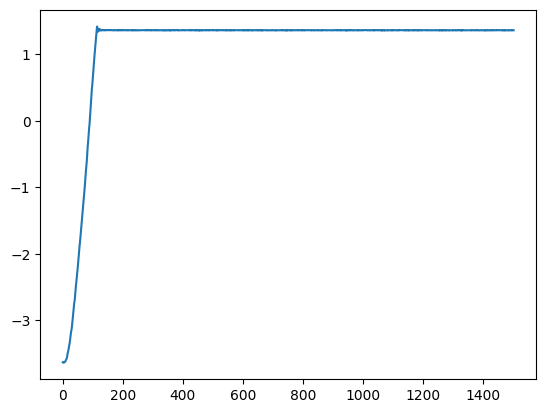

In [14]:
import matplotlib.pyplot as plt

indBx = []
anglePhi = []
for num in data:
    indBx.append(num[0])
    anglePhi.append(num[4])

plt.plot(indBx)
plt.show()    

In [2]:
#STOP
try:
            instrumentRotor.write_registers(0x6002, [0x0040])
            print('Стоп!')
except (IOError, AttributeError, ValueError):
            message = "Команда не прошла"
            print(message)

NameError: name 'instrumentRotor' is not defined

In [ ]:
#measuring cycle
step = 40
step_lin = 480
speed_lin = 0x0010
Bx, By, Bz, Z, Phi = getData()
PHI = Phi.split()[0].replace('\u00B0','').replace('\\xb0','').replace(',','.')
Phi0 = float(PHI[4:])
Phi_curr = float(PHI[4:])
print('начальный угол', Phi0)

data_list = []


while Phi_curr < 360:
    Bx, By, Bz, Z, Phi = getData()
    print('сырая выдача', Bx, By, Bz, Z, Phi)
    Phi = Phi.split()[0].replace('\u00B0','').replace('\\xb0','').replace(',','.')
    Phi_curr = float(Phi[4:])
    Bx = Bx.lstrip('b\'').split()[0].replace('\u00B0','').replace(',','.')
    Bx = digit_Bx()
    By = digit_By()
    Bz = digit_Bz()
    #Bx = float(Bx[5:11].replace(',','.'))
    #By = float(By[4:9].replace(',','.'))
    #Bz = float(Bz[4:9].replace(',','.'))
    Z = digit_Z() #float(Z[3:4].replace(',','.'))
    
    curr_list = []
    curr_list = [Bx, By, Bz, Z, Phi_curr]
    print(curr_list)
    data_list.append(curr_list)
    
    try:
        
        instrumentRotor.write_registers(0x0007, [0x0000])
        move = int(step*1.9)
        speed = 0x0001
        
        instrumentRotor.write_registers(0x6200, [0x0041, 0, move, speed, 0x03E8, 0x03E8, 0x0000, 0x0010])
        
    except (IOError, AttributeError, ValueError):
        message = "Команда не прошла"
        print(message)
    
    time.sleep(1.5)
    

    if [(Phi_curr < 360) & (abs(Phi_curr - Phi0) < 1)]:
        try:
        
            instrumentLinear.write_registers(0x0007, [0x0000])
            move_lin = int(step_lin*1.9)
        
            instrumentLinear.write_registers(0x6200, [0x0041, 0, move_lin, speed_lin, 0x03E8, 0x03E8, 0x0000, 0x0010])
        
        except (IOError, AttributeError, ValueError):
            message = "Команда не прошла"
            print(message)
        time.sleep(2)

    
    #time.sleep(1)
 
    
        

        
    
 

In [172]:
with open('rotor_data_spiral2.txt', 'w') as output:
    output.write(str(data_list))

In [173]:

Bx = []
for num in data_list:
    Bx.append(num[0])
print(Bx)    

[-1.105, -1.006, -0.916, -0.705, -0.369, -0.218, 0.264, 0.81, 1.505, 2.297, 3.25, 4.291, 5.475, 6.828, 8.363, 10.103, 12.048, 14.322, 16.852, 19.738, 22.952, 26.589, 30.702, 35.415, 40.828, 47.171, 54.661, 63.633, 74.531, 86.885, 102.946, 104.373, 124.616, 125.014, 146.216, 162.356, 166.553, 151.424, 140.125, 145.09, 150.233, 137.518, 135.543, 131.438, 114.682, 115.698, 94.007, 68.069, 69.223, 49.188, -6.151, -24.01, -5.331, 23.12, 52.941, 53.266, -0.945, -56.872, -59.739, -71.322, -97.214, -94.659, -89.991, -86.832, -81.227, -100.817, -105.724, -99.131, -122.151, -167.286, -199.281, -201.764, -190.861, -180.297, -179.499, -169.562, -162.99, -157.79, -154.813, -152.914, -152.496, -153.675, -156.424, -160.725, -167.636, -177.557, -189.205, -202.158, -207.167, -185.453, -138.341, -111.351, -111.074, -102.454, -86.433, -93.297, -95.184, -102.085, -100.825, -73.344, -67.152, -57.89, -4.089, 44.649, 38.577, 5.842, -25.712, -47.332, -22.438, 33.494, 50.266, 51.378, 79.942, 92.072, 87.839, 94

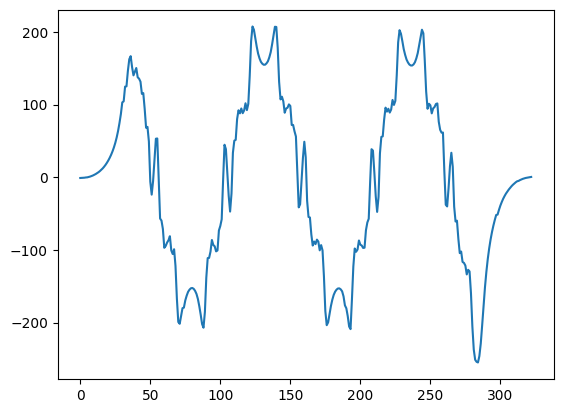

In [176]:
import matplotlib.pyplot as plt
plt.plot(Bx)
plt.show()